In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Step 2: Load dataset
df = pd.read_csv('Games.csv')

/tmp/ipython-input-13-808761425.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Games.csv')


In [ ]:
# Step 3: Handle null values
df['gameSubLabel'].fillna('N/A', inplace=True)
df['gameLabel'].fillna('N/A', inplace=True)
df['seriesGameNumber'].fillna('N/A', inplace=True)
df['seriesGameNumber'] = df['seriesGameNumber'].astype(str)
df['attendance'].fillna(df['attendance'].median(), inplace=True)


/tmp/ipython-input-14-66539232.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gameSubLabel'].fillna('N/A', inplace=True)
/tmp/ipython-input-14-66539232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

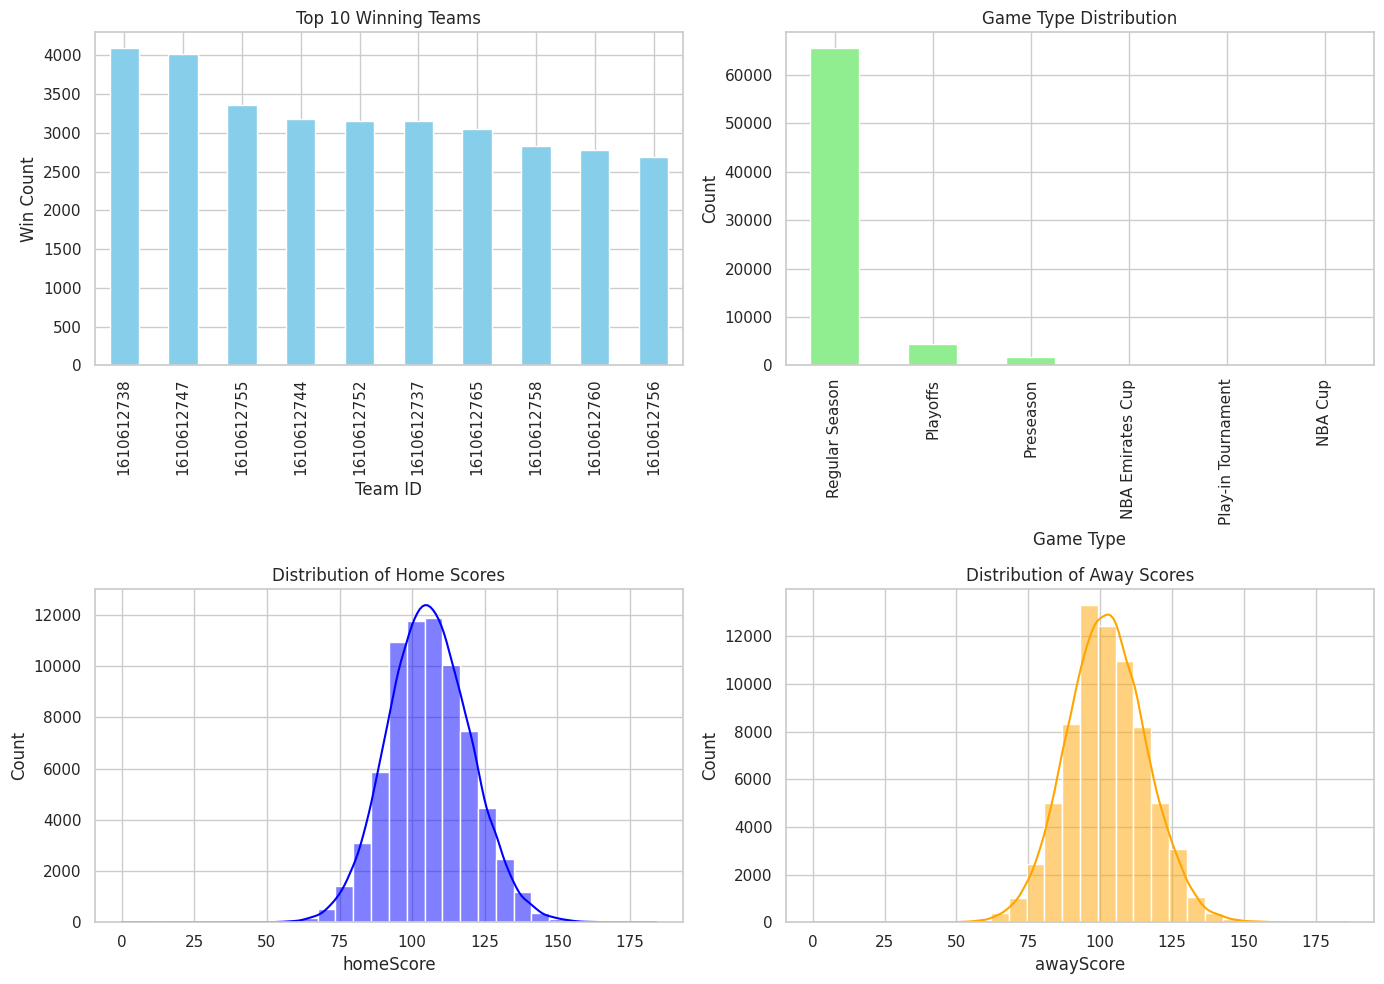

In [ ]:
# Step 4: EDA - Visualizations
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Top 10 winners
df['winner'].value_counts().head(10).plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Top 10 Winning Teams')
axs[0, 0].set_xlabel('Team ID')
axs[0, 0].set_ylabel('Win Count')

# Game types
df['gameType'].value_counts().plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Game Type Distribution')
axs[0, 1].set_xlabel('Game Type')
axs[0, 1].set_ylabel('Count')

# Home and away scores
sns.histplot(df['homeScore'], bins=30, kde=True, ax=axs[1, 0], color='blue')
axs[1, 0].set_title('Distribution of Home Scores')

sns.histplot(df['awayScore'], bins=30, kde=True, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Distribution of Away Scores')

plt.tight_layout()
plt.show()

In [ ]:
# Step 5: Feature selection + Binary Target
df = df.dropna(subset=['winner'])  # ensure target is clean
df['home_win'] = (df['winner'] == df['hometeamId']).astype(int)  # New binary target

In [ ]:
# Step 6: Encode gameType
le_game_type = LabelEncoder()
df['gameType_encoded'] = le_game_type.fit_transform(df['gameType'])

In [ ]:
# Step 7: Define features and target
X = df[['hometeamId', 'awayteamId', 'homeScore', 'awayScore', 'attendance', 'gameType_encoded']]
y = df['home_win']  # Binary target instead of winner

In [ ]:
# Step 8: Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 9: Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 10: Evaluate
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.9995130773511408

✅ Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5570
           1       1.00      1.00      1.00      8806

    accuracy                           1.00     14376
   macro avg       1.00      1.00      1.00     14376
weighted avg       1.00      1.00      1.00     14376


✅ Confusion Matrix:
 [[5565    5]
 [   2 8804]]
